In [82]:
# Loading libraries
# Data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint

# Data visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import matplotlib.pyplot as plt

In [93]:
score_null_replace = 0.01
eval_null_replace = 0.9
length_null_replace = 0.01
data = pd.read_csv('input_ML_Matrix_3.csv')
print(data.info())  
print(data.isna().sum())
print(data.columns)
data[' score/lengthQa'] = data[' score/lengthQa'].fillna(score_null_replace)
data['EvalueQa'] = data['EvalueQa'].fillna(eval_null_replace)
data[' score/lengthQb'] = data[' score/lengthQb'].fillna(score_null_replace)
data['EvalueQb'] = data['EvalueQb'].fillna(eval_null_replace)
data[' score/lengthQc'] = data[' score/lengthQc'].fillna(score_null_replace)
data['EvalueQc'] = data['EvalueQc'].fillna(eval_null_replace)
data[' score/lengthR'] = data[' score/lengthR'].fillna(score_null_replace)
data['EvalueR'] = data['EvalueR'].fillna(eval_null_replace)
data = data.fillna(length_null_replace)
print(data.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14105 entries, 0 to 14104
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sequences        14105 non-null  object 
 1   EvalueQa         5455 non-null   float64
 2    score/lengthQa  5455 non-null   float64
 3   EvalueQb         2453 non-null   float64
 4    score/lengthQb  2453 non-null   float64
 5   EvalueQc         4291 non-null   float64
 6    score/lengthQc  4291 non-null   float64
 7   EvalueR          4208 non-null   float64
 8    score/lengthR   4208 non-null   float64
 9   labels           14105 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.1+ MB
None
sequences              0
EvalueQa            8650
 score/lengthQa     8650
EvalueQb           11652
 score/lengthQb    11652
EvalueQc            9814
 score/lengthQc     9814
EvalueR             9897
 score/lengthR      9897
labels                 0
dtype: int64
Index(['sequences',

In [94]:
# Coding family column as numerical
le = LabelEncoder()
data['labels'] = le.fit_transform(data['labels'])
data.to_csv('updated_input_ML_Matrix.csv', index=False)

In [95]:
# Splitting the data into training and testing sets
X = data.drop(['labels', 'sequences'], axis=1)
Y = data['labels']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Accuracy: 1.0


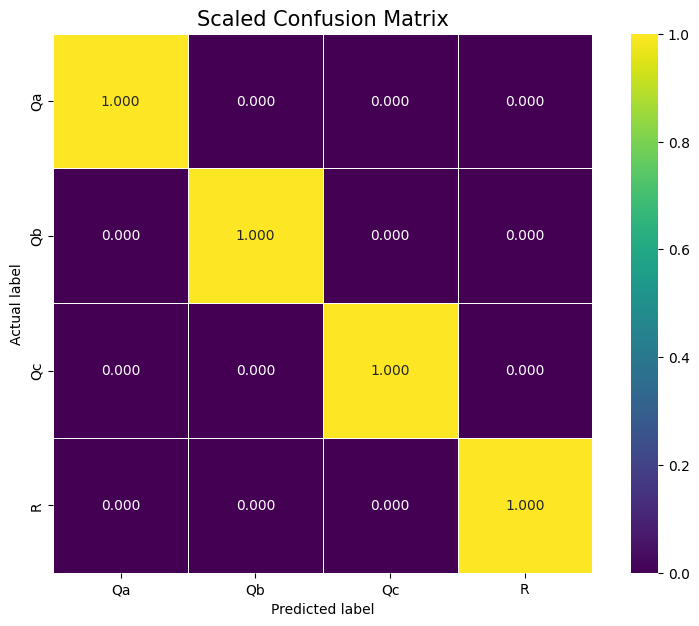

In [96]:
# Building the model
rf = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators is the number of trees in the forest 
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
labels = ['Qa', 'Qb', 'Qc', 'R']  # replace with your labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Scaled Confusion Matrix', size = 15);
plt.xticks(np.arange(len(labels)) + 0.5, labels);
plt.yticks(np.arange(len(labels)) + 0.5, labels);
plt.show()

In [77]:
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


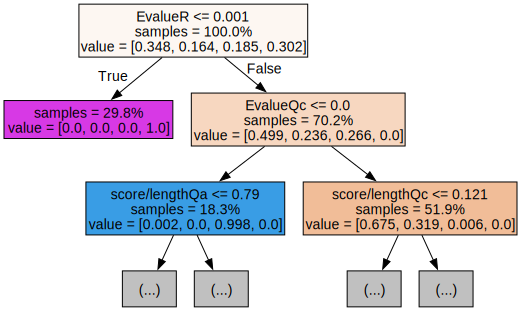

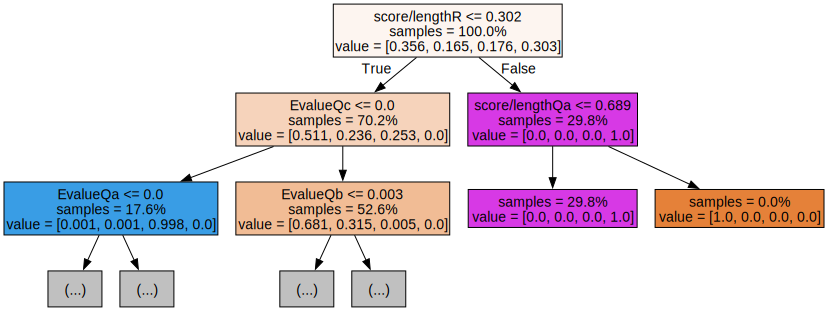

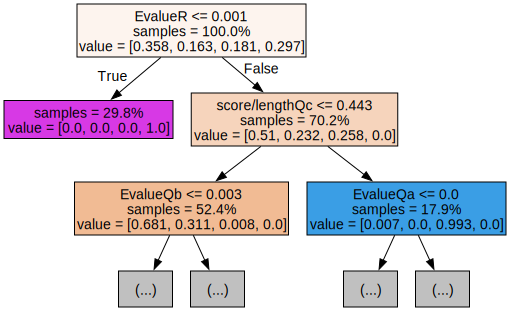

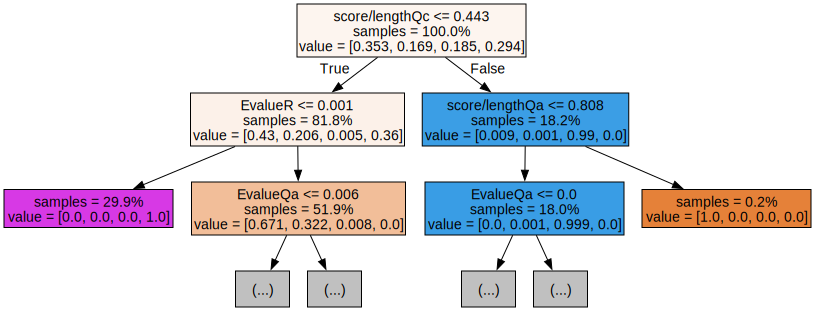

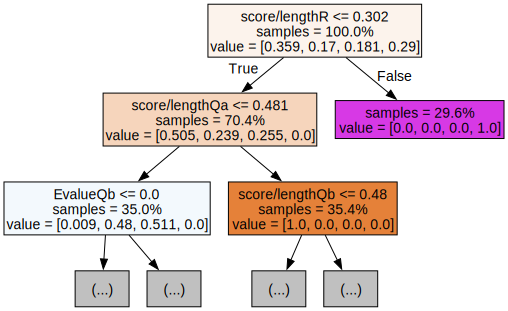

In [78]:
for i in range(5):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [79]:
# Hyperparameter tuning
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=100, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, Y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 491}


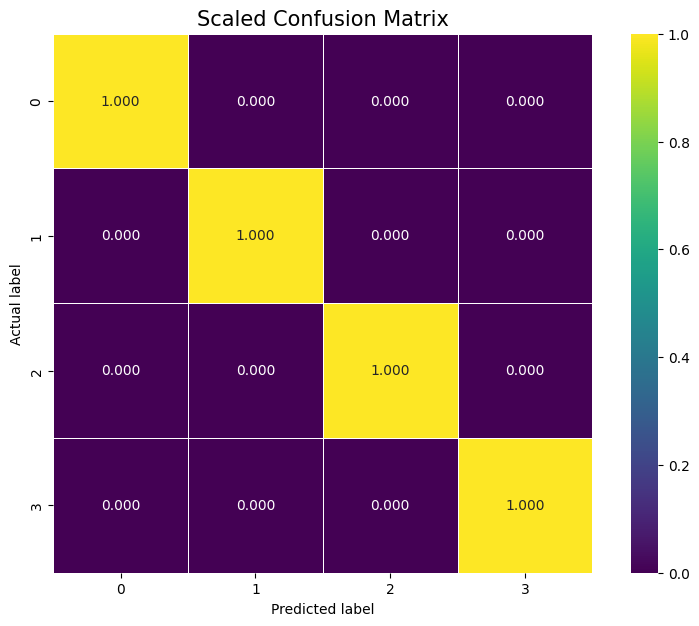

In [80]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Scaled Confusion Matrix', size = 15);
plt.show()

<Axes: >

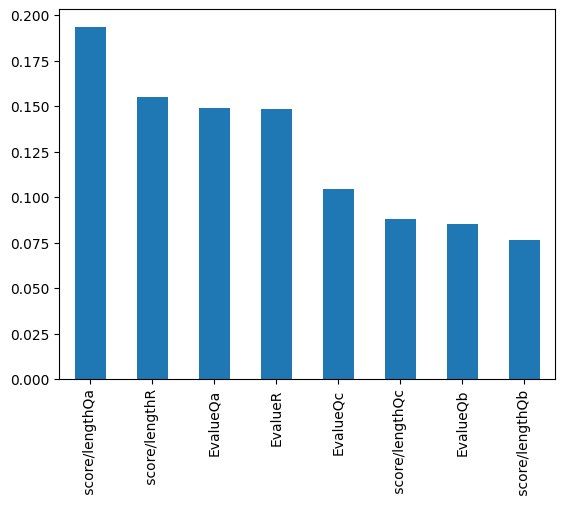

In [81]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()